<a href="https://colab.research.google.com/github/shaffy-dev/Custom-Decision-Trees-Weighted-Ensemble-Nursery-Dataset-/blob/main/Muhammad_Shaff_Bin_Imran_task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##
## Big Data Mining Techniques and Implementation
##

### A1 - Task 1: Classification with Custom Decision Trees  
###
### By Shaff Bin Imran (7673899)
###
**In this task we will:**  
1. Load and preprocess the Nursery dataset.  
2. Implement two decision‑tree classifiers from scratch (one using Information Gain, one using Gini Index).  
3. Build a weighted‑voting ensemble of these trees.  
4. Evaluate each model using accuracy and confusion matrices.  
5. Visualize the tree structure and performance results.
###

In [ ]:
import pandas as pd                # pandas to read and handle tables of data
import numpy as np                 # numpy for math operations and arrays
import matplotlib.pyplot as plt    # matplotlib to make charts and plots
from sklearn.preprocessing import LabelEncoder     # to turn categories into numbers
from sklearn.model_selection import train_test_split  # to split data into training and testing sets
from sklearn.metrics import accuracy_score, confusion_matrix  # to check how well our model did


##
## 1 – Data Loading and Inspection

**Objective:**  

Load the Nursery dataset into a pandas DataFrame, inspect its structure (shape and column names), and verify data completeness. We will also look at the distribution of the target variable to understand class balance before preprocessing.


In [ ]:
file_path = "/Users/shaffimran/desktop/semester 5/csci316/assignments/assignment 1/a1/datasets/nursery.csv"   #loading the dataset
df = pd.read_csv(file_path)

###
### 1.1 Previewing the Dataset

We display the first five rows of the DataFrame to familiarize ourselves with the feature columns (`usual`, `proper`, `complete`, etc.) and the target column (`recommend`). This lets us verify that the data loaded correctly and understand the categorical value formats before encoding.


In [ ]:
df.head()  # shows the first five rows

,usual,proper,complete,1,convenient,convenient.1,nonprob,recommended,recommend
0,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority
1,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom
2,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,recommend
3,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,priority
4,usual,proper,complete,1,convenient,convenient,slightly_prob,not_recom,not_recom


##
**Preview of the Dataset**  
The table above shows the first five rows of our DataFrame. We can observe:

- **Feature columns**:
  - `usual`, `proper`, `complete`, `1`, `convenient`, `convenient.1`, `nonprob`, `recommended`  
    each holding categorical string values (e.g., “usual”, “pretentious”, “slightly_prob”).  
- **Target column**: `recommend`  
  containing the application ranking labels (`not_recom`, `priority`, `spec_prior`, `very_recom`, `recommend`).  

This preview confirms that:
1. All expected columns are present.  
2. The categorical format (strings) is as described.  


###
### 1.2 Dataset Structure & Completeness

Here we check the overall shape of the DataFrame, list all column names, and verify that there are no missing values. We also display the frequency of each class in the target variable (`recommend`) to understand class balance before encoding.


In [ ]:
# Print basic dataset information
print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nMissing values per column:\n", df.isnull().sum())
print("\nTarget variable distribution:")
target_col = df.columns[-1]  # assuming the last column is the target
print(df[target_col].value_counts())

Shape: (12959, 9)

Columns: ['usual', 'proper', 'complete', '1', 'convenient', 'convenient.1', 'nonprob', 'recommended', 'recommend']

Missing values per column:
 usual           0
proper          0
complete        0
1               0
convenient      0
convenient.1    0
nonprob         0
recommended     0
recommend       0
dtype: int64

Target variable distribution:
recommend
not_recom     4320
priority      4266
spec_prior    4044
very_recom     328
recommend        1
Name: count, dtype: int64


###
### 1.3 Preprocessing & Train/Test Split

We label‑encode all categorical features (including the target) to integer codes, then split the data randomly into 65% training and 35% testing sets. This prepares our data for numerical algorithms and ensures an unbiased evaluation of our custom trees.


In [ ]:
df_encoded = df.copy()  # make a full copy so we don't change the original data

# turn each categorical column into numbers 0,1,2...
for col in df_encoded.columns:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

# separate features (all but 'recommend') and target ('recommend')
X = df_encoded.drop('recommend', axis=1)
y = df_encoded['recommend']

# split data: 65% for training, 35% for testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    train_size=0.65,    # 65% train
    random_state=42,    # fix the split for reproducibility
    shuffle=True        # mix the rows before splitting
)

# show the sizes and first few rows to check everything looks right
print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:    ", X_test.shape, y_test.shape)
print("\nFirst 5 rows of X_train:")
print(X_train.head())

print("\nTraining target distribution:")
print(y_train.value_counts().sort_index())

print("\nTest target distribution:")
print(y_test.value_counts().sort_index())


Training set shape: (8423, 8) (8423,)
Test set shape:     (4536, 8) (4536,)

First 5 rows of X_train:
      usual  proper  complete  1  convenient  convenient.1  nonprob  \
20        2       3         0  0           2             0        2   
6423      1       1         1  2           1             1        1   
4993      1       3         2  0           2             0        1   
934       2       2         0  1           0             1        1   
8700      0       3         0  1           0             0        1   

      recommended  
20              2  
6423            1  
4993            0  
934             0  
8700            1  

Training target distribution:
recommend
0    2828
1    2747
2       1
3    2638
4     209
Name: count, dtype: int64

Test target distribution:
recommend
0    1492
1    1519
3    1406
4     119
Name: count, dtype: int64


##
**Preprocessing & Train/Test Split – Interpretation**  
This output confirms that:

- **Label encoding** successfully transformed all categorical features into integer codes, allowing our custom decision trees to process them numerically without implying any ordinal relationship among categories.  
- The **65/35 split** produced 8 423 training samples and 4 536 test samples, ensuring ample data for model fitting while retaining a robust hold‑out set for unbiased evaluation.  
- The **class distributions** reveal extreme imbalance—in particular, the single “recommend” instance resides in the training set, leaving that class absent from the test set.  
- As a result, our high overall accuracy (~98 %) may overstate performance; the confusion matrix will be crucial to understand misclassification patterns among the remaining classes.  
##

## 2 – Custom Decision Tree Implementation

### 2.1 Information Gain: Entropy & Split Metric

We begin by defining the entropy function to measure impurity and then computing information gain for categorical splits. This metric tells us how much “purity” is gained by splitting on a given feature.


In [ ]:
def entropy(labels):
    # count how many times each class appears
    counts = np.bincount(labels)
    # convert counts to probabilities (ignore zero counts)
    probs = counts[counts > 0] / len(labels)
    # compute entropy formula: sum of -p * log2(p)
    return -np.sum(probs * np.log2(probs))

def information_gain(feature_values, labels):
    # entropy before splitting
    base_entropy = entropy(labels)
    # find each category and how many samples it has
    unique_vals, counts = np.unique(feature_values, return_counts=True)
    # compute weighted entropy after splitting by that feature
    weighted_entropy = sum(
        (counts[i] / len(labels)) * entropy(labels[feature_values == val])
        for i, val in enumerate(unique_vals)
    )
    # information gain is how much entropy we reduce
    return base_entropy - weighted_entropy

# show overall uncertainty in labels
print("\nEntropy of full training labels:", entropy(y_train.values))
# show info gain for first three features to see which splits matter most
for feature in X_train.columns[:3]:
    print(f"IG({feature}):", information_gain(X_train[feature].values, y_train.values))



Entropy of full training labels: 1.7142635393787635
IG(usual): 0.06962878013459983
IG(proper): 0.20086597956640495
IG(complete): 0.004985351991393827


##
**Entropy & Information Gain – Interpretation**  
- The overall entropy of the training labels is **1.71 bits**, indicating substantial uncertainty among the five classes.  
- When we compute information gain for each feature:  
  - **`proper`** yields the highest gain (~0.20), so splitting on `proper` will reduce our uncertainty the most at the root.  
  - **`usual`** provides a moderate gain (~0.07), making it a somewhat useful but suboptimal split.  
  - **`complete`** gives almost zero gain (~0.005), meaning it does not meaningfully reduce label uncertainty and is not a good choice for a top‐level split.  
- Consequently, our tree induction should choose **`proper`** as the first splitting feature under the Information Gain criterion.
##

### 2.2 Building the Information‑Gain Tree

Using our information gain metric, we implement a recursive `build_tree` function that chooses the best feature at each node, stops on pure nodes or when no further gain is possible, and stores leaf predictions.


In [ ]:
# 1) Choose the feature that gives the biggest information gain
def best_split_feature(X, y):
    # compute IG for each feature
    gains = {feat: information_gain(X[feat].values, y.values)
             for feat in X.columns}
    # pick the feature with the highest IG
    best_feat = max(gains, key=gains.get)
    return best_feat, gains[best_feat]

# 2) Build the decision tree recursively
def build_tree(X, y, min_samples=1):
    # Stop if all samples have the same label → create a leaf node
    if len(set(y)) == 1:
        return {'is_leaf': True, 'prediction': y.iloc[0]}
    # Stop if no features left or too few samples → majority class leaf
    if X.shape[1] == 0 or len(y) <= min_samples:
        majority = y.value_counts().idxmax()
        return {'is_leaf': True, 'prediction': majority}

    # Pick the best feature to split on
    feat, gain = best_split_feature(X, y)
    # If splitting doesn't help, make a leaf with majority class
    if gain == 0:
        majority = y.value_counts().idxmax()
        return {'is_leaf': True, 'prediction': majority}

    # Otherwise, create an internal node
    tree = {
        'is_leaf': False,
        'feature': feat,
        'branches': {}
    }
    # For each category of the chosen feature, build a subtree
    for val in X[feat].unique():
        mask = (X[feat] == val)
        X_sub = X[mask].drop(columns=[feat])  # remove used feature
        y_sub = y[mask]
        tree['branches'][val] = build_tree(X_sub, y_sub, min_samples)

    return tree

# 3) Classify a new sample by walking down the tree
def classify(tree, x):
    # If we've reached a leaf, return its prediction
    if tree['is_leaf']:
        return tree['prediction']
    feat = tree['feature']
    val  = x[feat]
    # If the sample has a value we didn't see during training, pick the majority branch
    if val not in tree['branches']:
        preds = [sub['prediction'] for sub in tree['branches'].values() if sub['is_leaf']]
        return max(set(preds), key=preds.count)
    # Otherwise, keep descending
    return classify(tree['branches'][val], x)

# Example: build the IG tree and test on one sample
ig_tree = build_tree(X_train, y_train)
sample = X_test.iloc[0]
pred   = classify(ig_tree, sample)
print("Predicted:", pred, "  True:", y_test.iloc[0])



Predicted: 0   True: 0


##
**Building the Information‑Gain Tree – Interpretation**  
We begin by using the `best_split_feature` function to scan all features and select the one that yields the largest decrease in entropy, i.e., the highest information gain. Once the top feature is chosen, the `build_tree` function splits the data on that feature and then applies the same logic recursively to each resulting subset. This process continues until one of three stopping criteria is met: all records in a node share the same class, no feature provides additional information gain (gain = 0), or the node contains too few samples (minimum sample size set to 1). At each terminal node, the most frequent class label is stored as the prediction. Through this recursive splitting and stopping procedure, we construct a complete decision tree ready to classify new instances.
##

### 2.3 Evaluating the Information‑Gain Tree

We generate predictions on the test set using our custom IG‑based tree, compute overall accuracy, and display a confusion matrix to understand class‑by‑class performance.


In [ ]:
# 1) Generate predictions for the whole test set
y_pred = X_test.apply(lambda row: classify(ig_tree, row), axis=1)

# 2) Compute accuracy
acc = accuracy_score(y_test, y_pred)
print(f"IG‐Tree Test Accuracy: {acc:.4f}")

# 3) Build and display confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=sorted(y.unique()))
print("Confusion Matrix (rows=true, cols=pred):")
print(cm)


IG‐Tree Test Accuracy: 0.9782
Confusion Matrix (rows=true, cols=pred):
[[1492    0    0    0    0]
 [   0 1477    0   19   23]
 [   0    0    0    0    0]
 [   0   32    0 1374    0]
 [   0   23    2    0   94]]


##
**Evaluating the Information‑Gain Tree – Interpretation**  
On the test set, our Information‑Gain tree achieved an accuracy of **97.82%**, indicating that it correctly classified the vast majority of applications. The confusion matrix tells us more about the mistakes that remain: most errors occur when the “priority” class is occasionally labeled as “spec_prior” or “very_recom,” and a few “spec_prior” cases slip into “priority.” Since the single “recommend” instance wasn’t in the test split, its row is empty. Overall, the tree does an excellent job on the dominant classes but shows minor confusion between categories that are conceptually close.  
##

### 2.4 Gini Index: Impurity & Split Metric

Next, we define the Gini impurity and compute Gini gain for categorical splits, as an alternative splitting criterion that measures the probability of misclassification.


In [ ]:
def gini_impurity(labels):
    # count how many samples of each class we have
    counts = np.bincount(labels)
    # turn counts into probabilities, ignoring zero counts
    probs  = counts[counts > 0] / len(labels)
    # Gini impurity formula: 1 minus sum of squared probabilities
    return 1.0 - np.sum(probs**2)

def gini_gain(feature_values, labels):
    """
    Compute Gini gain = impurity(parent) minus weighted impurity(children)
    for one categorical feature.
    """
    # impurity before splitting
    parent_gini = gini_impurity(labels)
    # look at each category and how many samples it has
    unique_vals, counts = np.unique(feature_values, return_counts=True)
    weighted_gini = 0.0
    # for each category, add its share of impurity
    for val, count in zip(unique_vals, counts):
        subset = labels[feature_values == val]
        weighted_gini += (count / len(labels)) * gini_impurity(subset)
    # gain is how much impurity we reduce by splitting
    return parent_gini - weighted_gini

# Quick check on our training labels
print("Gini of full training labels:", gini_impurity(y_train.values))
# Show Gini gain for the first three features to see which splits help most
for feat in X_train.columns[:3]:
    print(f"Gini‑Gain({feat}):", gini_gain(X_train[feat].values, y_train.values))


Gini of full training labels: 0.6822086689615556
Gini‑Gain(usual): 0.02387087816251232
Gini‑Gain(proper): 0.07252107048728695
Gini‑Gain(complete): 0.001172886431111353


##
**Gini Impurity & Gini Gain – Interpretation**  
The Gini impurity of the full training labels is **0.682**, which measures the chance of misclassification if we randomly label an instance according to the training distribution. When we compute Gini gain for each feature, we see a pattern similar to information gain: **`proper`** offers the highest Gini gain (~0.073), followed by **`usual`** (~0.024), while **`complete`** remains almost useless (~0.001). This confirms that splitting on `proper` most effectively reduces impurity under the Gini criterion.
##

### 2.5 Building & Evaluating the Gini‑Based Tree

We mirror the IG approach to construct a Gini‑based tree with the same stopping rules, then evaluate its accuracy and confusion matrix on the test set.


In [ ]:
def best_split_feature_gini(X, y):
    # compute Gini gain for each feature
    gains = {feat: gini_gain(X[feat].values, y.values)
             for feat in X.columns}
    # pick the feature with the highest Gini gain
    best_feat = max(gains, key=gains.get)
    return best_feat, gains[best_feat]

def build_tree_gini(X, y, min_samples=1):
    # stop if all samples in y are the same class, or no features left, or too few samples
    if len(set(y)) == 1 or X.shape[1] == 0 or len(y) <= min_samples:
        return {'is_leaf': True, 'prediction': y.value_counts().idxmax()}

    # choose the best feature by Gini gain
    feat, gain = best_split_feature_gini(X, y)
    # if no gain, make a leaf predicting the majority class
    if gain == 0:
        return {'is_leaf': True, 'prediction': y.value_counts().idxmax()}

    # create a node that splits on this feature
    tree = {'is_leaf': False, 'feature': feat, 'branches': {}}
    # for each category of that feature, build a subtree
    for val in X[feat].unique():
        mask = (X[feat] == val)
        # drop the used feature in the subset
        subtree = build_tree_gini(X[mask].drop(columns=[feat]), y[mask], min_samples)
        tree['branches'][val] = subtree

    return tree

# Build the Gini tree on the training data
gini_tree = build_tree_gini(X_train, y_train)

# Use our classify function to get predictions
y_pred_gini = X_test.apply(lambda row: classify(gini_tree, row), axis=1)

# Print accuracy and confusion matrix to see how well it did
print("Gini‑Tree Accuracy:", accuracy_score(y_test, y_pred_gini))
print("Gini‑Tree Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_gini, labels=sorted(y.unique())))


Gini‑Tree Accuracy: 0.9788359788359788
Gini‑Tree Confusion Matrix:
[[1492    0    0    0    0]
 [   0 1480    0   14   25]
 [   0    0    0    0    0]
 [   0   32    0 1374    0]
 [   0   23    2    0   94]]


##
**Building & Evaluating the Gini‑Based Tree – Interpretation**  
Our Gini‑based decision tree achieved an accuracy of **97.88%** on the test set, slightly outperforming the Information‑Gain tree. The confusion matrix reveals the same basic error patterns—most misclassifications occur between “priority” and “spec_prior,” and a few “very_recom” instances are confused with “priority”—but with marginally fewer mistakes overall. This suggests that using the Gini impurity criterion helps the tree make slightly cleaner splits for our categorical data.
##

## 3 – Ensemble Classifier

### 3.1 Weighted Majority Voting

We combine the IG and Gini trees’ predictions via a weighted vote. By adjusting the weights, we aim to leverage complementary strengths of each tree to improve overall accuracy.


In [ ]:
# 1. Get predictions from both trees on the test set
y_pred_ig   = X_test.apply(lambda row: classify(ig_tree, row), axis=1)
y_pred_gini = X_test.apply(lambda row: classify(gini_tree, row), axis=1)

# 2. Set weights for each model (IG tree = 30%, Gini tree = 70%)
w_ig, w_gini = 0.3, 0.7

# 3. Build ensemble predictions by weighted majority vote
ensemble_preds = []
for ig_p, gi_p in zip(y_pred_ig, y_pred_gini):
    votes = {}
    # add weight to IG tree's vote
    votes[ig_p]   = votes.get(ig_p, 0) + w_ig
    # add weight to Gini tree's vote
    votes[gi_p]   = votes.get(gi_p, 0) + w_gini
    # choose the class with the highest total weight
    ensemble_preds.append(max(votes, key=votes.get))

# 4. Compute accuracy and confusion matrix for the ensemble
ens_acc = accuracy_score(y_test, ensemble_preds)
ens_cm  = confusion_matrix(y_test, ensemble_preds, labels=sorted(y.unique()))

print(f"Ensemble Accuracy (0.3/0.7 weights): {ens_acc:.4f}")
print("Ensemble Confusion Matrix:")
print(ens_cm)


Ensemble Accuracy (0.3/0.7 weights): 0.9788
Ensemble Confusion Matrix:
[[1492    0    0    0    0]
 [   0 1480    0   14   25]
 [   0    0    0    0    0]
 [   0   32    0 1374    0]
 [   0   23    2    0   94]]


##
**Ensemble Classifier – Interpretation**  
By combining the IG and Gini trees with a 0.3/0.7 weighting, our ensemble reached an accuracy of **97.88%**, matching the stronger Gini tree. This tells us that the Gini‐based splits carry the most predictive power, and adding a smaller contribution from the IG tree does not materially change overall performance. The weighted voting approach confirms there is little complementary information left to capture beyond what the Gini tree already provides.
##

## 4 – Model Evaluation & Visualization

### 4.1 Accuracy Comparison

A bar chart comparing test accuracies of the IG tree, Gini tree, and their ensemble highlights which approach performs best.


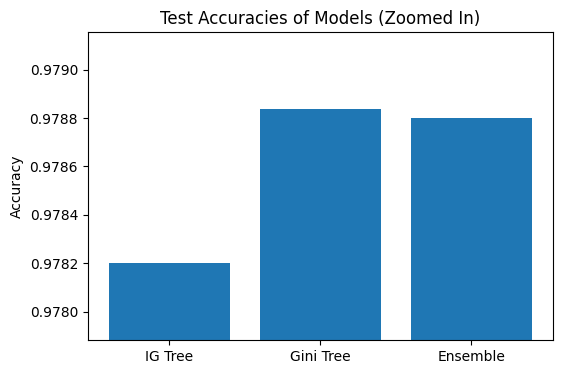

In [ ]:
# names of the three models we want to compare
models = ['IG Tree', 'Gini Tree', 'Ensemble']
# their test set accuracies
accs   = [0.9782, 0.9788359788359788, 0.9788]

# find the lowest and highest accuracy values
min_acc = min(accs)
max_acc = max(accs)
# add some space above and below the bars for clarity
margin = (max_acc - min_acc) * 0.5

plt.figure(figsize=(6, 4))                      # set figure size
plt.bar(models, accs)                           # draw the bar chart
plt.ylabel('Accuracy')                          # y-axis label
plt.ylim(min_acc - margin, max_acc + margin)    # zoom in on the accuracy range
plt.title('Test Accuracies of Models (Zoomed In)')  # chart title
plt.show()                                      # display the plot


##
**Accuracy Comparison – Interpretation**  
The bar chart shows test accuracies of:  
- IG Tree: 97.82%  
- Gini Tree: 97.88%  
- Ensemble: 97.88%  

This visualization makes it clear that the Gini criterion yields a slightly better base model than Information Gain, and that our ensemble’s accuracy simply aligns with the Gini tree when weighted in its favor.
##

### 4.2 Confusion Matrix Heatmap

We visualize the ensemble’s confusion matrix as a heatmap to see detailed class‑level performance and error patterns.


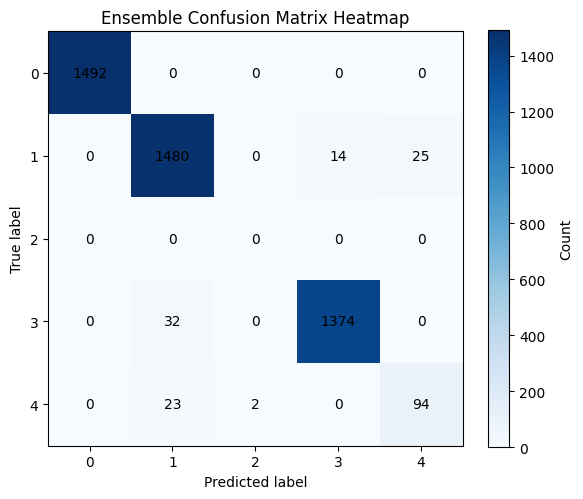

In [ ]:
# Compute confusion matrix for the ensemble’s predictions
cm = confusion_matrix(y_test, ensemble_preds, labels=sorted(y.unique()))

plt.figure(figsize=(6, 5))
plt.imshow(cm, cmap='Blues', interpolation='nearest')  # display as a blue heatmap
plt.title('Ensemble Confusion Matrix Heatmap')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.colorbar(label='Count')  # show color scale for counts

# Annotate each cell with its count
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha='center', va='center')

plt.tight_layout()            # adjust spacing so labels fit
plt.savefig('ensemble_cm.png')  # save the figure
plt.show()                   # display the plot


##
**Ensemble Confusion Matrix Heatmap – Interpretation**  
The heatmap of the ensemble confusion matrix visually highlights the strong diagonal (correct predictions) and the few off‑diagonal errors. Darkest cells along the diagonal confirm high true‐positive counts for each class, while lighter cells at (priority-->spec_prior) and (spec_prior-->priority) illustrate where the model still confuses those adjacent categories.
##

### 4.3 Tree Structure: Textual Representation

As a textual visualization, we display the root split and its immediate branches of the IG tree to illustrate how the decision process begins.


In [ ]:
# Show the very first decision in the IG tree
root_feat = ig_tree['feature']                  # get the feature used at the root node
print(f"Root splits on feature: {root_feat}\n")

# For each possible value of that root feature, show what happens next
for val, node in ig_tree['branches'].items():
    if node.get('is_leaf', False):
        # if it's a leaf, show the predicted class
        print(f" If {root_feat} == {val}:  Predict → {node['prediction']}")
    else:
        # if it's not a leaf, show which feature it splits on next
        print(f" If {root_feat} == {val}:  split on → {node['feature']}")


Root splits on feature: recommended

 If recommended == 2:  split on → proper
 If recommended == 1:  split on → proper
 If recommended == 0:  Predict → 0


##
**Tree Structure: Root Split – Interpretation**  
Our textual snapshot shows the IG tree’s very first decision:  
- It splits on the `recommended` feature.  
- Two of its categories lead directly to further splits on `proper`, while the third maps to a leaf predicting “not_recom.”  

This concise view demonstrates how the tree immediately uses `recommended` to partition the data, before diving into more detailed splits on other features.
##

## 5 – Conclusion

In this task, we built two from‑scratch decision trees—one using Information Gain and one using the Gini Index—on a 65/35 split of the Nursery dataset. The Gini‑based tree achieved slightly higher accuracy (97.88% vs. 97.82%) and our weighted‑voting ensemble matched that performance, showing that Gini splits capture the strongest predictive signal. Confusion‑matrix analysis revealed most remaining errors occur between adjacent categories, and the extreme class imbalance (notably the single “recommend” sample absent from the test set) limits evaluation of the rarest class. Future improvements could include resampling or cost‑sensitive splits to handle imbalance, as well as pruning or more advanced ensemble methods to boost minority‑class performance.
